In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from sklearn.model_selection import train_test_split
import os
import numpy as np
from PIL import Image
from tensorflow.keras.callbacks import CSVLogger
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback
import pandas as pd
from tensorflow.keras.models import load_model

In [75]:
data = []
label = []


In [76]:
def load_images_from_folder(folder_path, label_index):
  if not os.path.exists(folder_path):
    print(f"Warning: Folder not found: {folder_path}")
    return
  for filename in os.listdir(folder_path):
    img = Image.open(os.path.join(folder_path, filename)).convert('RGB')
    img = img.resize((128, 128))
    img = tf.keras.preprocessing.image.img_to_array(img)
    data.append(img)
    label.append(label_index)

for i in range(len(classes)):
  load_images_from_folder(f'/content/training_dataset/{classes[i]}', i)

In [77]:
print(len(label))
print(len(data))

250
250


In [78]:
x=np.array(data)
y = np.array(label)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
X_train = X_train/255.0
X_test = X_test/255.0

In [81]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3),kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [83]:
callbacks = [CSVLogger('training_log.csv', separator=',', append=False)]

In [84]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=callbacks)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 934ms/step - accuracy: 0.2092 - loss: 2.5804 - val_accuracy: 0.4600 - val_loss: 1.8548
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5448 - loss: 1.6221 - val_accuracy: 0.6200 - val_loss: 1.1539
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 819ms/step - accuracy: 0.6432 - loss: 1.1807 - val_accuracy: 0.6800 - val_loss: 1.1040
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 774ms/step - accuracy: 0.6089 - loss: 1.2668 - val_accuracy: 0.7000 - val_loss: 1.2293
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7478 - loss: 0.9979 - val_accuracy: 0.8600 - val_loss: 0.8318
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 814ms/step - accuracy: 0.7692 - loss: 0.8520 - val_accuracy: 0.8000 - val_loss: 0.7907
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 772ms/step - accuracy: 0.7885 - loss: 0.7719 - val_accuracy: 0.8600 - val_loss: 0.5408
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8573 - loss: 0.6954 - val_accuracy: 0.8400 - val_loss: 0.65

In [85]:
loss,accuarcy=model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.9392 - loss: 0.4527


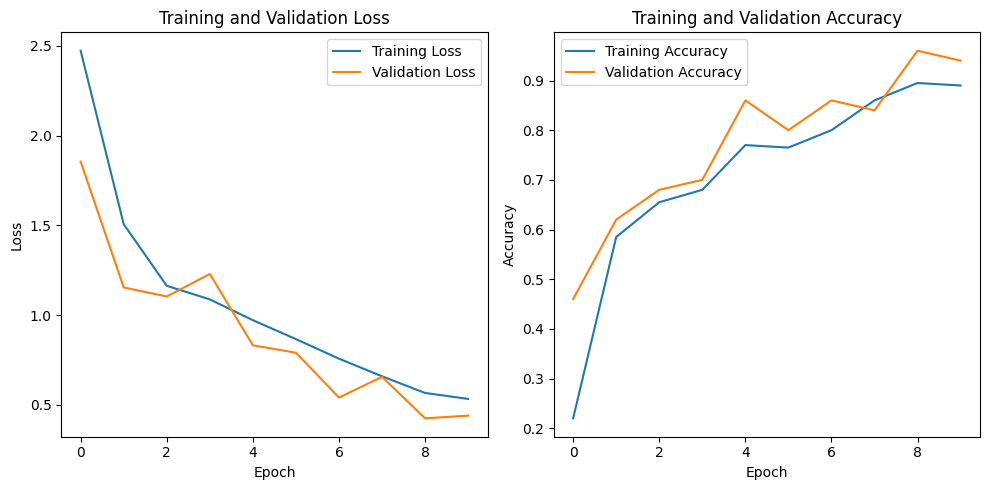

In [86]:
df = pd.read_csv('training_log.csv')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['loss'], label='Training Loss')
plt.plot(df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.subplot(1, 2, 2)
plt.plot(df['accuracy'], label='Training Accuracy')
plt.plot(df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()


In [87]:
predict = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step


In [97]:
accuarcy

0.9399999976158142

In [88]:
model.save('my_model.h5')

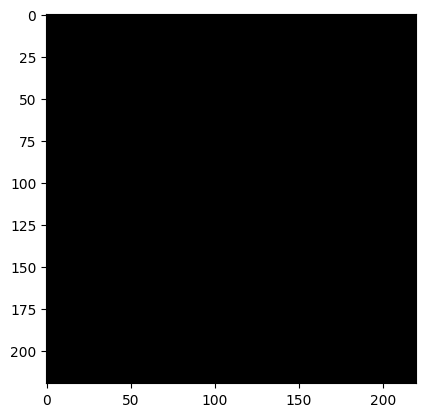

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
The predicted color is: black


In [104]:
def predict_color(image_path, model_path='my_model.h5'):
    model = load_model(model_path)
    img = Image.open(image_path).convert('RGB')
    img = img.resize((128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    classes = ['black','blue','brown','green','grey','orange','red','violet','white','yellow']
    predicted_color = classes[predicted_class]
    return predicted_color
image ='/content/Black.png'
image_data = Image.open(image)
plt.imshow(image_data)
plt.show()
new_image_path = image
predicted_color = predict_color(new_image_path)
print(f"The predicted color is: {predicted_color}")